In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
carset = pd.read_csv(r"C:\Users\bpssi\Downloads\CarPrice_Assignment.csv")

In [51]:
X = carset[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 
            'highwaympg']].values
Y = carset['price'].values

In [52]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

m, n = X.shape
w = np.zeros(n)
b = 0
alpha = 0.1
iterations = 1000

In [53]:
def gradient_descent(X, Y, w, b, alpha, iterations):  
    cost_history = []  
    
    for it in range(iterations):
        dw = np.zeros(n)
        db = 0
        total_cost = 0
        
        for i in range(m):
            prediction = np.dot(X[i], w) + b
            error = prediction - Y[i]
            total_cost += (error**2) / (2 * m)
            dw += (1/m) * error * X[i]
            db += (1/m) * error
        
        w -= alpha * dw
        b -= alpha * db
        cost_history.append(total_cost)  # Store the cost per iteration

    return w, b, cost_history


In [54]:
w, b, cost_history = gradient_descent(X, Y, w, b, alpha, iterations)

In [55]:
def predict(X, w, b):
    return np.dot(X, w) + b

In [56]:
for i in range(m):
    predicted_price = predict(X[i], w, b)
    print(f"Predicted price for car {i+1}: {predicted_price:.2f}")
    print(f"Error: {predicted_price - Y[i]:.2f}\n")

Predicted price for car 1: 12930.73
Error: -564.27

Predicted price for car 2: 12930.73
Error: -3569.27

Predicted price for car 3: 17933.43
Error: 1433.43

Predicted price for car 4: 11619.60
Error: -2330.40

Predicted price for car 5: 15876.76
Error: -1573.24

Predicted price for car 6: 15243.50
Error: -6.50

Predicted price for car 7: 18177.46
Error: 467.46

Predicted price for car 8: 18375.84
Error: -544.16

Predicted price for car 9: 18765.56
Error: -5109.44

Predicted price for car 10: 17726.64
Error: -132.53

Predicted price for car 11: 12972.63
Error: -3457.37

Predicted price for car 12: 12972.63
Error: -3952.37

Predicted price for car 13: 16516.32
Error: -4453.68

Predicted price for car 14: 16615.52
Error: -4489.48

Predicted price for car 15: 17390.99
Error: -7174.01

Predicted price for car 16: 27043.31
Error: -3716.69

Predicted price for car 17: 27066.58
Error: -14248.42

Predicted price for car 18: 29653.23
Error: -7226.77

Predicted price for car 19: -846.28
Error: -5

In [57]:
def predict(X, w, b):
    return np.dot(X, w) + b

predicted_prices = predict(X, w, b)

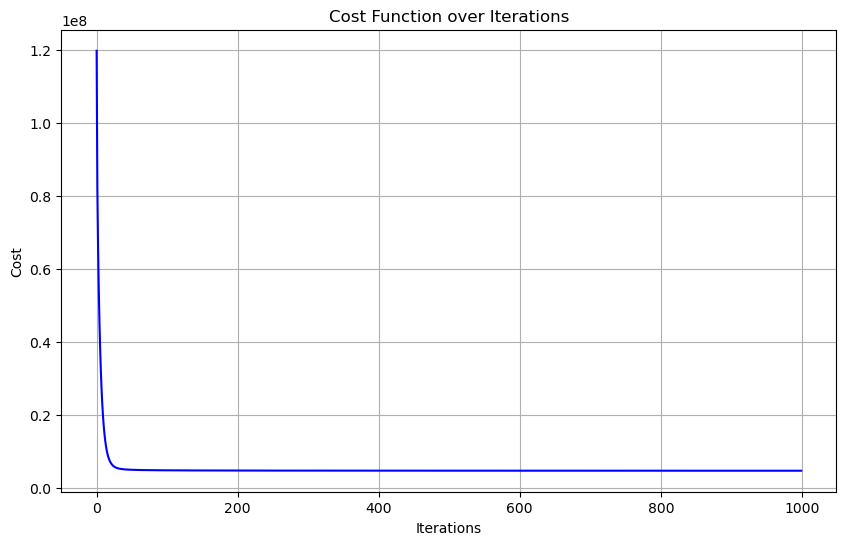

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

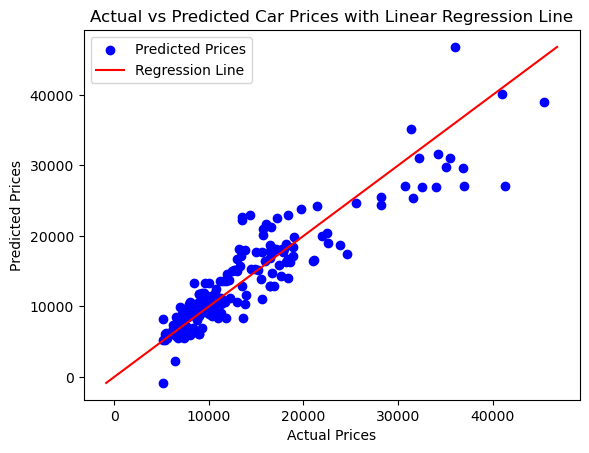

In [59]:
plt.scatter(Y, predicted_prices, color='blue', label='Predicted Prices')

min_price = min(Y.min(), predicted_prices.min())
max_price = max(Y.max(), predicted_prices.max())
plt.plot([min_price, max_price], [min_price, max_price], color='red', label='Regression Line')

plt.title('Actual vs Predicted Car Prices with Linear Regression Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()